## Proje-3 Araç Yakıt Tüketimi

### Kütüphanelerin yüklenmesi

In [61]:
# Kütüphaneler
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# istatistik 
from scipy import stats
from scipy.stats import norm, skew

# Machine Learning
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.base import clone

# uyarıları kapatalım.
import warnings
warnings.filterwarnings("ignore")

### Verileri Yükleyelim

In [2]:
# veriyi aktaralım
sutun_isimleri = ["hedef", "silindir", "motor_hacmi", "beygir_gucu", "agirlik", "ivme", "model_yil", "mensei"]
veri = pd.read_csv("/DATA/datasets/auto-mpg.csv", names = sutun_isimleri, na_values = "?", sep = ";")
veri.head()

,hedef,silindir,motor_hacmi,beygir_gucu,agirlik,ivme,model_yil,mensei
0,180,8,3070,130.0,3504.0,120,70,1
1,150,8,3500,165.0,3693.0,115,70,1
2,180,8,3180,150.0,3436.0,110,70,1
3,160,8,3040,150.0,3433.0,120,70,1
4,170,8,3020,140.0,3449.0,105,70,1


### Verinin Şekli

In [3]:
# veri şekli
print("veri şekli : ", veri.shape)

veri şekli :  (398, 8)


### Veri bilgileri

In [4]:
# veri bilgisi
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hedef        398 non-null    int64  
 1   silindir     398 non-null    int64  
 2   motor_hacmi  398 non-null    int64  
 3   beygir_gucu  392 non-null    float64
 4   agirlik      392 non-null    float64
 5   ivme         398 non-null    int64  
 6   model_yil    398 non-null    int64  
 7   mensei       398 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 25.0 KB


### Temel İstatistiksel Bilgiler

In [5]:
# temel istatistiksel bilgi
veri.describe()

,hedef,silindir,motor_hacmi,beygir_gucu,agirlik,ivme,model_yil,mensei
count,398.000000,398.000000,398.000000,392.000000,392.000000,398.000000,398.000000,398.000000
mean,235.145729,5.454774,3907.814070,104.469388,2977.584184,192.947236,77.444724,2.728643
std,78.159843,1.701004,3045.409147,38.491160,849.402560,295.617800,12.654116,9.371522
min,90.000000,3.000000,1000.000000,46.000000,1613.000000,80.000000,70.000000,1.000000
25%,175.000000,4.000000,1460.000000,75.000000,2225.250000,139.000000,73.000000,1.000000
50%,230.000000,4.000000,2600.000000,93.500000,2803.500000,155.000000,76.000000,1.000000
75%,290.000000,8.000000,4547.500000,126.000000,3614.750000,173.000000,79.000000,2.000000
max,466.000000,8.000000,9800.000000,230.000000,5140.000000,3035.000000,205.000000,82.000000


### Kayıp veriler var mı?

In [6]:
# kayıp veri
print(veri.isna().sum())

hedef          0
silindir       0
motor_hacmi    0
beygir_gucu    6
agirlik        6
ivme           0
model_yil      0
mensei         0
dtype: int64


### Eksikleri ortalama ile dolduralım

In [7]:
# beygir gücü eksiklerini ortalama ile doldur.
veri["beygir_gucu"] = veri["beygir_gucu"].fillna(veri["beygir_gucu"].mean())
# agirlik eksiklerini ortalama ile doldur.
veri["agirlik"] = veri["agirlik"].fillna(veri["agirlik"].mean())
print(veri.isna().sum())

hedef          0
silindir       0
motor_hacmi    0
beygir_gucu    0
agirlik        0
ivme           0
model_yil      0
mensei         0
dtype: int64


### Beygir gücünün ortalamasının etkisi

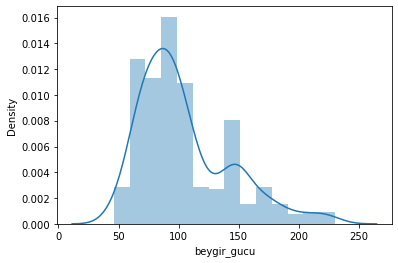

In [8]:
# beygir gücü ortalamasının etkisi
sns.distplot(veri.beygir_gucu)
plt.show()

### Veri Özellikleri Arasındaki İlişki

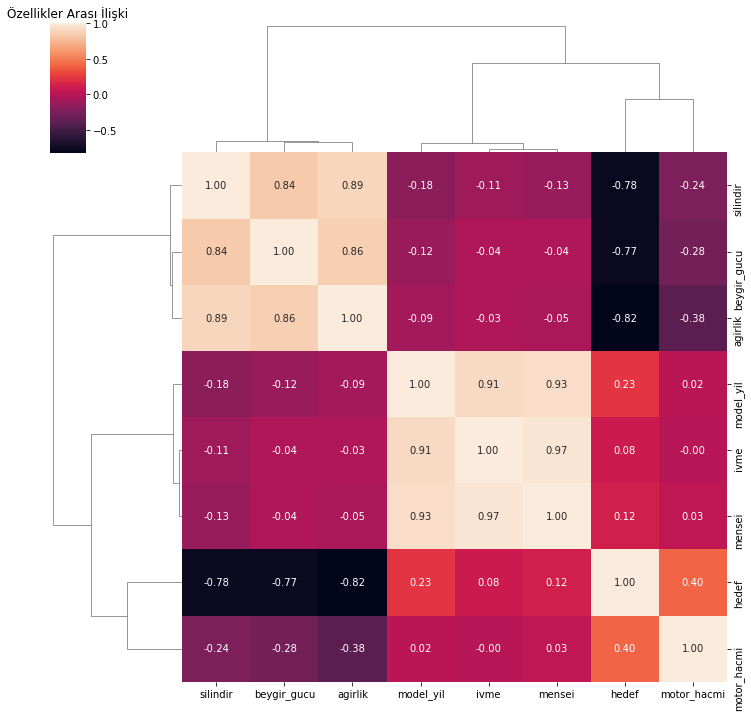

In [9]:
# veri özellikleri arası ilişki
corr_matrix = veri.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Özellikler Arası İlişki")
plt.show()

### Hedef ile ilişkisi 0.75 den büyük olan özellikler

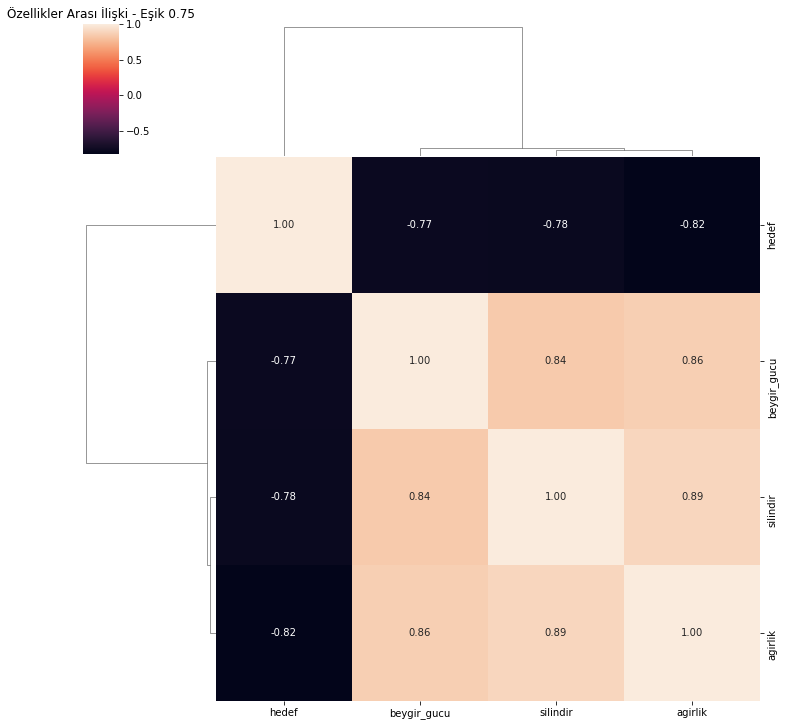

In [10]:
# hedef ile arasındaki ilişki 0.75 den büyük olan özellikler
threshold = 0.75
filtre = np.abs(corr_matrix["hedef"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(veri[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Özellikler Arası İlişki - Eşik 0.75")
plt.show()

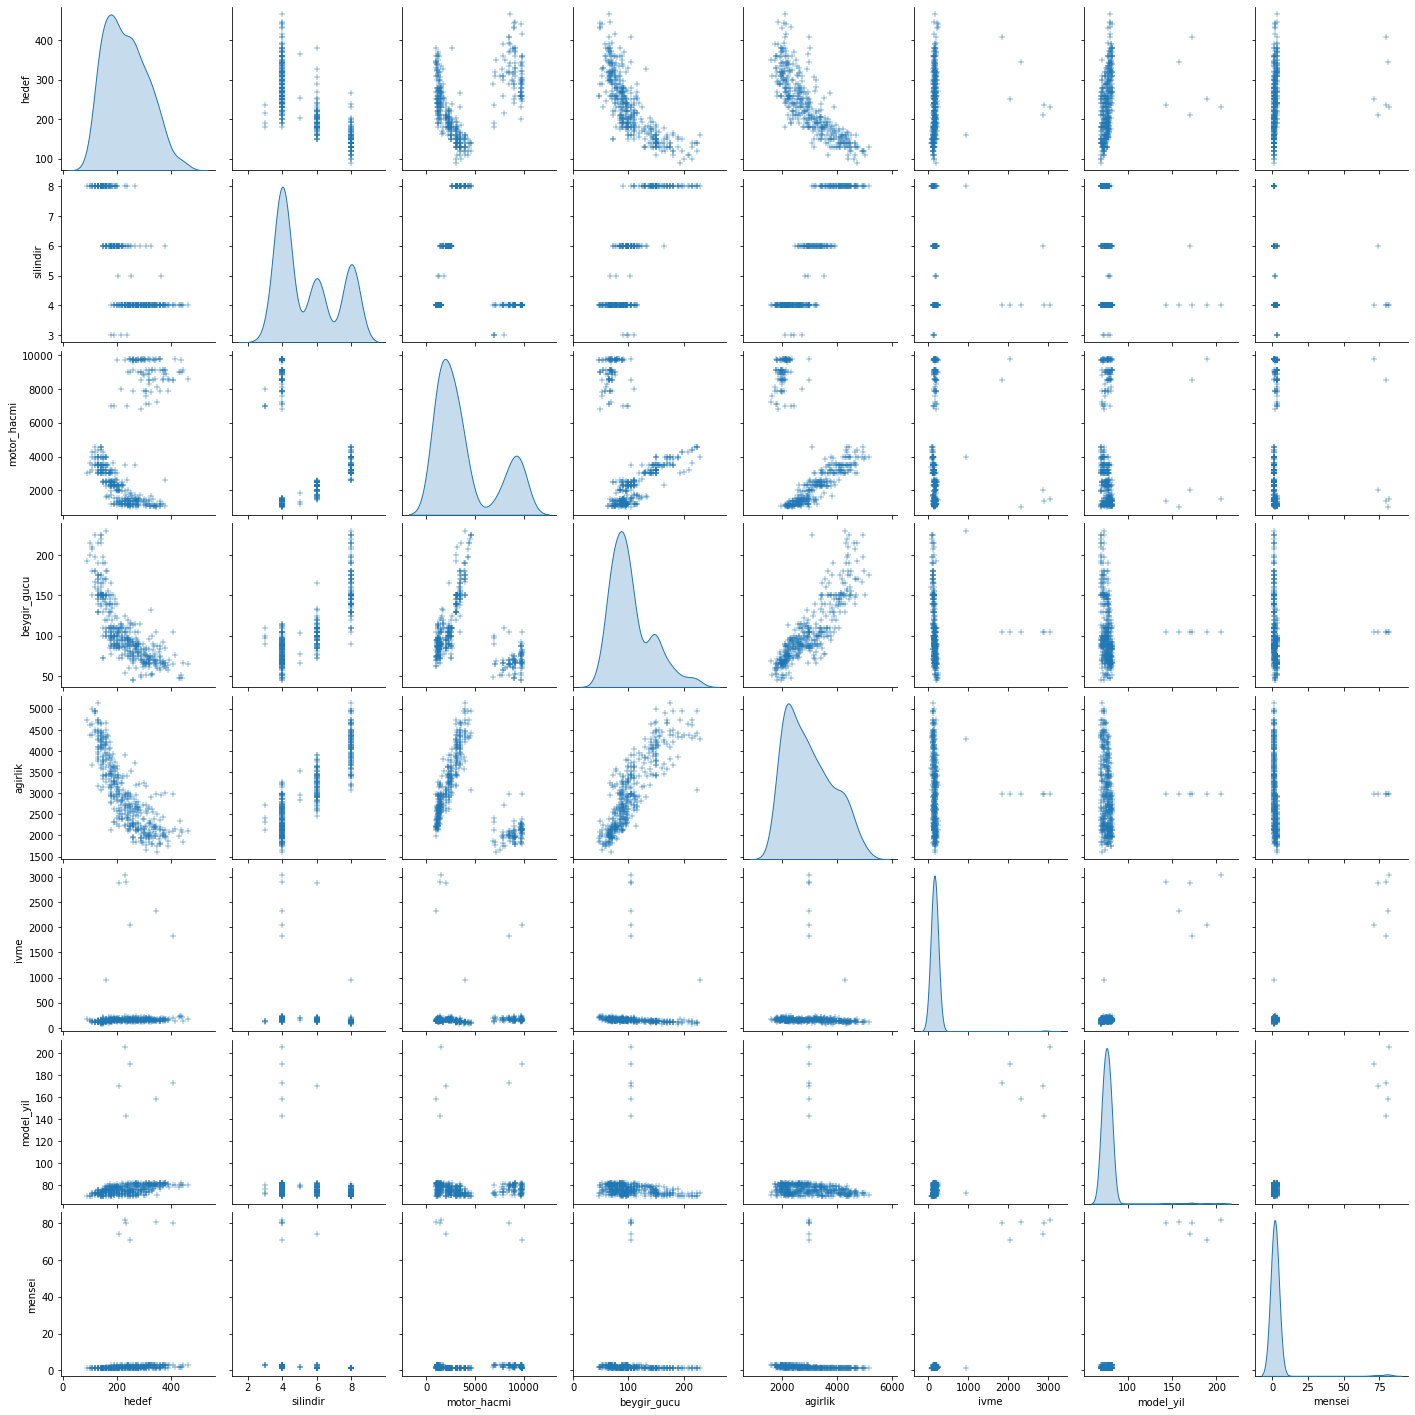

In [11]:
sns.pairplot(veri, diag_kind = "kde", markers = "+")
plt.show()

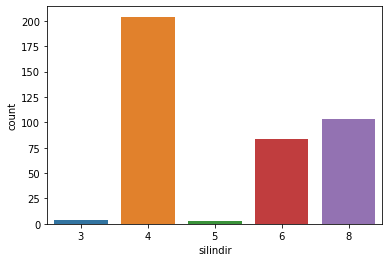

4    204
8    103
6     84
3      4
5      3
Name: silindir, dtype: int64


In [12]:
plt.figure()
sns.countplot(veri["silindir"])
plt.show()
print(veri["silindir"].value_counts())

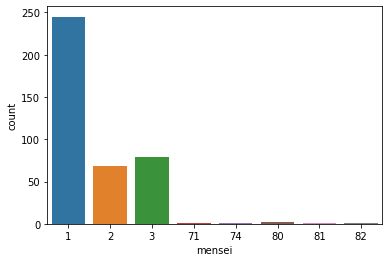

1     245
3      79
2      68
80      2
71      1
74      1
81      1
82      1
Name: mensei, dtype: int64


In [13]:
plt.figure()
sns.countplot(veri["mensei"])
plt.show()
print(veri["mensei"].value_counts())

### Kutu grafikleri

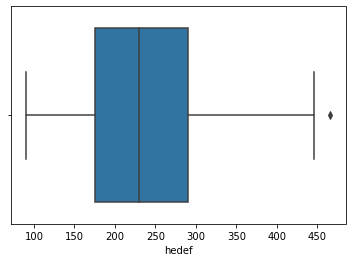

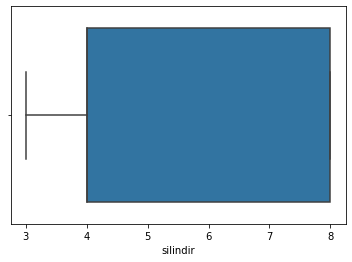

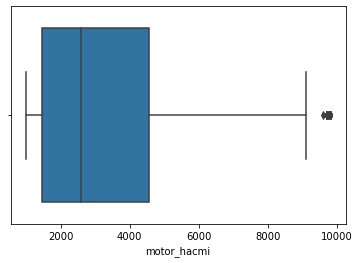

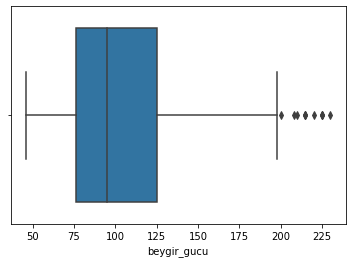

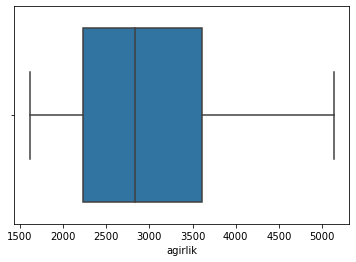

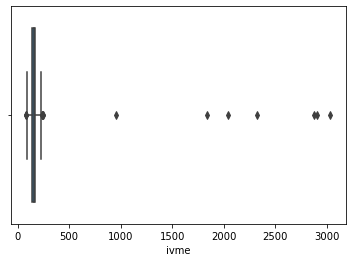

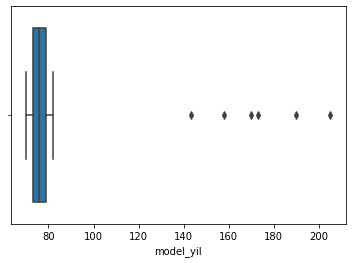

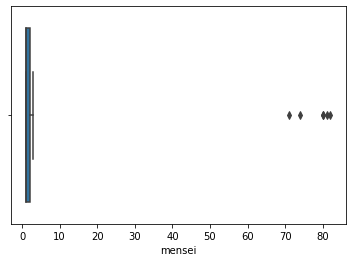

In [14]:
for c in veri.columns:
    plt.figure()
    sns.boxplot(x = c, data = veri, orient = "v")
    plt.show()

### Aykırı Değerlerin bulunup, çıkarılması

In [15]:
tanim = veri.describe()
tanim

,hedef,silindir,motor_hacmi,beygir_gucu,agirlik,ivme,model_yil,mensei
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,235.145729,5.454774,3907.814070,104.469388,2977.584184,192.947236,77.444724,2.728643
std,78.159843,1.701004,3045.409147,38.199187,842.959464,295.617800,12.654116,9.371522
min,90.000000,3.000000,1000.000000,46.000000,1613.000000,80.000000,70.000000,1.000000
25%,175.000000,4.000000,1460.000000,76.000000,2228.500000,139.000000,73.000000,1.000000
50%,230.000000,4.000000,2600.000000,95.000000,2831.500000,155.000000,76.000000,1.000000
75%,290.000000,8.000000,4547.500000,125.000000,3608.000000,173.000000,79.000000,2.000000
max,466.000000,8.000000,9800.000000,230.000000,5140.000000,3035.000000,205.000000,82.000000


In [16]:
# beygir gücü
thr = 2
horsepower_desc = tanim["beygir_gucu"]
q3_hp = horsepower_desc[6]
q1_hp = horsepower_desc[4]
IQR_hp = q3_hp - q1_hp
top_limit_hp = q3_hp + thr * IQR_hp
bottoom_limit_hp = q1_hp - thr * IQR_hp
filter_hp_bottom = bottoom_limit_hp < veri["beygir_gucu"]
filter_hp_top = veri["beygir_gucu"] < top_limit_hp
filter_hp = filter_hp_bottom & filter_hp_top
veri = veri[filter_hp]

In [17]:
# ivme
acceleration_desc = tanim["ivme"]
q3_acc = acceleration_desc[6]
q1_acc = acceleration_desc[4]
IQR_acc = q3_acc -q1_acc
top_limit_acc = q3_acc + thr * IQR_acc
bottom_limit_acc = q1_acc - thr * IQR_acc
filter_acc_bottom = bottom_limit_acc < veri["ivme"]
filter_acc_top = veri["ivme"] < top_limit_acc
filter_acc = filter_acc_bottom & filter_acc_top
veri = veri[filter_acc]

### Öz nitelikler

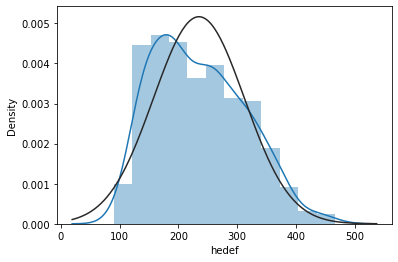

In [18]:
# hedef değişken dağılımı
plt.figure()
sns.distplot(veri.hedef, fit = norm)
plt.show()

### mu ve sigma değerleri

In [19]:
# mu sigma
(mu, sigma) = norm.fit(veri["hedef"])
print("mu : {}, sigma = {}".format(mu, sigma))

mu : 234.8082901554404, sigma = 77.22025918554436


### Q-Q Grafiği

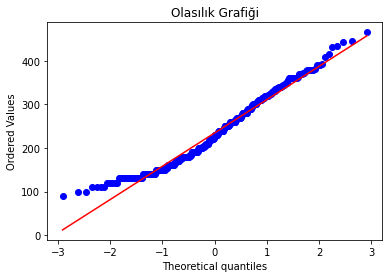

In [20]:
# qq plot
plt.figure()
stats.probplot(veri["hedef"], plot = plt)
plt.title("Olasılık Grafiği")
plt.show()

### Çarpıklığı azaltalım

In [21]:
# log1p ile çarpıklığı azaltalım
veri["hedef"] = np.log1p(veri["hedef"])

### Öznitelikler

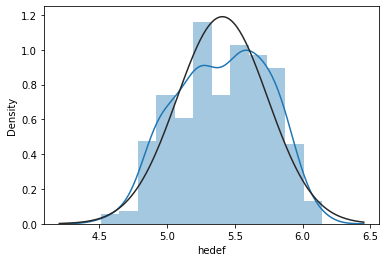

In [22]:
plt.figure()
sns.distplot(veri.hedef, fit = norm)
plt.show()

### Çarpıklık düzeldikten sonra mu ve sigma değerleri

In [25]:
# Çarpıklığı düzeltilen hedef değişkenin mu ve sigma değeri
(mu, sigma) = norm.fit(veri["hedef"])
print("mu : {}, sigma = {}".format(mu, sigma))

mu : 5.408156575049726, sigma = 0.33520831366724646


### Q-Q Grafiği

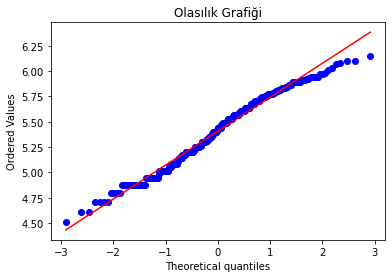

In [26]:
# qq plot
plt.figure()
stats.probplot(veri["hedef"], plot = plt)
plt.title("Olasılık Grafiği")
plt.show()

### Diğer verilerin çarpıklıklarının kontrolü

In [27]:
# veri seti içindeki diğer verilerin çarpıklıkları
carpik_ozellikler = veri.apply(lambda x: skew(x.dropna())).sort_values(ascending = True)
carpiklik = pd.DataFrame(carpik_ozellikler, columns = ["çarpık"])
carpiklik

,çarpık
hedef,-0.147016
model_yil,0.013780
ivme,0.201308
agirlik,0.522987
silindir,0.524684
mensei,0.902793
beygir_gucu,0.991121
motor_hacmi,1.002579


### Öznitelik Mühendisliği Kodlama

In [28]:
# Öznitelik işlemleri
veri["silindir"] = veri["silindir"].astype(str)
veri["mensei"] = veri["mensei"].astype(str)
veri = pd.get_dummies(veri)

#### Ön İşlem

In [29]:
# bölünme x-y
x = veri.drop(["hedef"], axis = 1)
y = veri.hedef

#### Eğitim test bölünmesi

In [30]:
# eğitim test bölünmesi
X_egitim, X_test, Y_egitim, Y_test = train_test_split(x, y, test_size = 0.9,)

#### Standardizasyon

In [31]:
# standardizasyon
scaler = RobustScaler()
X_egitim = scaler.fit_transform(X_egitim)
X_test = scaler.transform(X_test)

#### Doğrusl Regresyon

In [32]:
# doğrusal regresyon
lr = LinearRegression()
lr.fit(X_egitim, Y_egitim)
print("Doğrusal Regresyon Katsayıları : ", lr.coef_)
y_predicted_dummy = lr.predict(X_test)
mse_dogrusal = mean_squared_error(Y_test, y_predicted_dummy)
print("Doğrusal Regresyon Ortalama Kare Hatası : ", mse_dogrusal)

Doğrusal Regresyon Katsayıları :  [ 1.84232729e-02 -1.37378675e-01 -2.49817374e-01 -3.03577825e-02
  1.61335903e-01 -2.28498776e-01  1.17444975e-01 -1.11022302e-16
  8.25589680e-02  2.84948332e-02 -4.65954157e-02 -2.91308168e-02
  6.40773786e-02]
Doğrusal Regresyon Ortalama Kare Hatası :  0.014150295020716441


#### Ridge Regresyon

ridge Katsayıları :  [ 0.02219813 -0.1484252  -0.22159187 -0.02791048  0.15141502 -0.16270315
  0.11088523  0.          0.05513445 -0.00331653 -0.03740354 -0.02715851
  0.05521117]
Ridge En iyi tahmin :  Ridge(alpha=0.31622776601683794, max_iter=10000, random_state=42)
Ridge Ortalama Kare Hata :  0.01368612371196804
--------------------------------------------------------------------------------


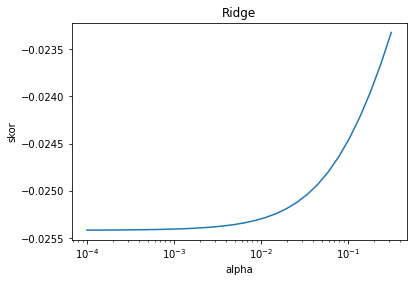

In [33]:
# ridge regresyon
ridge = Ridge(random_state = 42, max_iter = 10000)
alphas = np.logspace(-4, -0.5, 30)
tuned_parameters = [{"alpha" : alphas}]
n_folds = 5
clf = GridSearchCV(ridge, tuned_parameters, cv = n_folds, scoring = "neg_mean_squared_error")
clf.fit(X_egitim, Y_egitim)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]
print("ridge Katsayıları : ", clf.best_estimator_.coef_)
ridge = clf.best_estimator_
print("Ridge En iyi tahmin : ", ridge)
y_predicted_dummy = clf.predict(X_test)
mse_ridge = mean_squared_error(Y_test, y_predicted_dummy)
print("Ridge Ortalama Kare Hata : ", mse_ridge)
print(80*"-")
plt.figure()
plt.semilogx(alphas, scores)
plt.xlabel("alpha")
plt.ylabel("skor")
plt.title("Ridge")
plt.show()

#### Lasso Regresyon

Lasso Katsayıları :  [ 0.02065135 -0.14931736 -0.26015294  0.          0.10515683 -0.
  0.04764677  0.         -0.         -0.         -0.00193637  0.
  0.        ]
Lasso en iyi tahminleyici :  Lasso(alpha=0.013538761800225433, max_iter=10000, random_state=42)
Lasso ortalama kare hata :  0.015216983034407036
--------------------------------------------------------------------------------


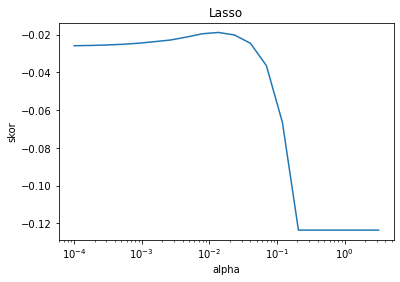

In [35]:
# lasso
lasso = Lasso(random_state = 42, max_iter = 10000)
alphas = np.logspace(-4, 0.5, 20)
tuned_parameters = [{"alpha" : alphas}]
n_folds = 5
clf = GridSearchCV(lasso, tuned_parameters, cv = n_folds, scoring = "neg_mean_squared_error")
clf.fit(X_egitim, Y_egitim)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]
print("Lasso Katsayıları : ", clf.best_estimator_.coef_)
lasso = clf.best_estimator_
print("Lasso en iyi tahminleyici : ", lasso)
y_predicted_dummy = clf.predict(X_test)
mse_lasso = mean_squared_error(Y_test, y_predicted_dummy)
print("Lasso ortalama kare hata : ",mse_lasso)
print(80*"-")
plt.figure()
plt.semilogx(alphas, scores)
plt.xlabel("alpha")
plt.ylabel("skor")
plt.title("Lasso")
plt.show()

#### Elastik ağ

In [106]:
# Elastic Net
parametersGrid = {"alpha":alphas, "l1_ratio": np.arange(0.0, 1.0, 0.05)}
eNet = ElasticNet(random_state = 42, max_iter = 10000)
clf = GridSearchCV(eNet, parametersGrid, cv = n_folds, scoring = "neg_mean_squared_error")
clf.fit(X_egitim, Y_egitim)
print("Elastik Ağ katsayıları : ", clf.best_estimator_.coef_)
print("Elastik Ağ en iyi tahminleyici : ", clf.best_estimator_)
y_predicted_dummy = clf.predict(X_test)
mse_elastik = mean_squared_error(Y_test, y_predicted_dummy)
print("Elastik ağ ortalama kare hata : ", mse_elastik)

Elastik Ağ katsayıları :  [ 0.02643118 -0.1608741  -0.21147812  0.          0.10839968 -0.
  0.07254535  0.          0.         -0.00365953 -0.01305262 -0.
  0.        ]
Elastik Ağ en iyi tahminleyici :  ElasticNet(alpha=0.040296113202004, l1_ratio=0.25, max_iter=10000,
           random_state=42)
Elastik ağ ortalama kare hata :  0.014977816395624292


### Doğrusal, Ridge, Lasso, Elastic Görseli

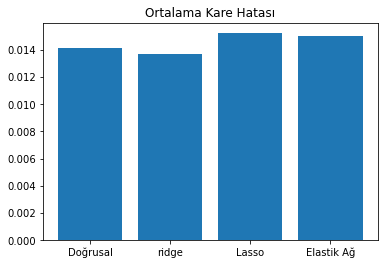

In [108]:
langs = ["Doğrusal", "ridge", "Lasso", "Elastik Ağ"]
students = [mse_dogrusal, mse_ridge, mse_lasso, mse_elastik]
plt.bar(langs, students)
plt.title("Ortalama Kare Hatası")
plt.show()